## TP 1 - data mining - Thomas Ranvier, Nicolas Désilets

Setup et chargement des datasets

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jaccard

%matplotlib inline

datasets_names = ['chess', 'connect', 'mushroom', 'pumsb', 'pumsb_star', 'small', 'retail', 'kosarak']
datasets = {}

for name in datasets_names:
    temp_str = [i.strip().split() for i in open('datasets/' + name + '.dat').readlines()]
    datasets[name] = [list(map(int, line)) for line in temp_str]

## 1.

#### Implémentation de l'algorithme d'échantillonage des motifs fréquents

In [267]:
#Part of the algorithm that needs to be run each time
def freq_sampling(dataset, w, normalised_w):
    random_pattern_index = np.random.choice(len(dataset), p=normalised_w)#2.
    return [attr for attr in dataset[random_pattern_index] if np.random.randint(2)]#3.

#Function that runs the algorithm k times
def freq_sampling_k(dataset, k):
    patterns = []
    #We create the weights out of the loop so it takes less time overall
    w = [2**abs(len(motif)) for motif in dataset]#1.
    sum_w = sum(w)
    normalised_w = [i / sum_w for i in w]
    done = False
    for _ in range(k):
        patterns.append(tuple(freq_sampling(dataset, w, normalised_w)))
    return patterns

#Function that runs the algo for all loaded datasets, except kosarak and retail (too heavy)
def freq_sampling_all_datasets(k):
    patterns_freq = {}
    for dataset_name in datasets:
        if dataset_name != 'kosarak' and dataset_name != 'retail':
            patterns_freq[dataset_name] = freq_sampling_k(datasets[dataset_name], k)
            print('dataset ' + dataset_name + ' done')
    return patterns_freq

## 2.

#### Implémentation de l'algorithme d'échantillonage basé sur l'aire

In [268]:
def area_sampling(dataset, w, normalised_w):
    random_pattern_index = np.random.choice(len(dataset), p=normalised_w)#2.
    k_range = list(range(1, len(dataset[random_pattern_index]) + 1))#weights id(i) = i
    normalised_k_range = [i / sum(k_range) for i in k_range]
    k = np.random.choice(k_range, p=normalised_k_range)#3.
    return sorted(np.random.choice(dataset[random_pattern_index], size=k, replace=False))#4.

#Function that runs the algorithm k times
def area_sampling_k(dataset, k):
    patterns = []
    #We create the weights out of the loop so it takes less time overall
    w = [abs(len(motif))*(2**(abs(len(motif)) - 1)) for motif in dataset]#1.
    sum_w = sum(w)
    normalised_w = [i / sum_w for i in w]
    for _ in range(k):
        patterns.append(tuple(area_sampling(dataset, w, normalised_w)))
    return patterns

#Function that runs the algo for all loaded datasets, except kosarak and retail (too heavy)
def area_sampling_all_datasets(k):
    patterns_area = {}
    for dataset_name in datasets:
        if dataset_name != 'kosarak' and dataset_name != 'retail':
            patterns_area[dataset_name] = freq_sampling_k(datasets[dataset_name], k)
            print('dataset ' + dataset_name + ' done')
    return patterns_area

Exécution des algos des questions 1 et 2, pour tous les datasets chargés et 1000 itérations à chaque fois

In [118]:
sampled_patterns_freq = freq_sampling_all_datasets(1000)

dataset chess done
dataset connect done
dataset mushroom done
dataset pumsb done
dataset pumsb_star done
dataset small done


In [5]:
sampled_patterns_area = area_sampling_all_datasets(1000)

dataset chess done
dataset connect done
dataset mushroom done
dataset pumsb done
dataset pumsb_star done
dataset small done


## 3.

#### Implémentation de la fonction qui, donné un ensemble de motifs extraits et le dataset correspondant, renvoie la fréquence de chaque motif

La fonction 'pattern_freq' calcule la fréquence d'apparition du pattern donné au sein du dataset dont il est extrait.

In [119]:
def pattern_freq(pattern, dataset):
    freq = .0
    for p in dataset:
        appears_in_p = True
        for attr in pattern:
            if attr not in p:
                appears_in_p = False
                break
        if appears_in_p:
            freq += 1.
    return freq / len(dataset)

def patterns_freq(patterns, dataset):
    result = {}
    for pattern in patterns:
        result[pattern] = pattern_freq(pattern, dataset)
    return result

#### Implémentation de la fonction qui, donné un ensemble de motifs extraits et le dataset correspondant, renvoie l'aire de chaque motif

In [120]:
def patterns_area(p_f):
    p_a = {}
    for i in p_f.items():
        p_a[i[0]] = i[1] * len(i[0])
    return p_a

## 5.

#### Affichage des distributions pour 5 datasets et 1000 réalisations

In [121]:
def display_distributions(sampled_patterns, dataset_name):
    p_f = patterns_freq(sampled_patterns, datasets[dataset_name])
    p_a = patterns_area(p_f)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.hist(list(p_f.values()), bins=60)
    ax1.set_title('Histogramme des fréquences')
    ax2.hist(list(p_a.values()), bins=60)
    ax2.set_title('Histogramme des aires')

## Dataset : chess

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'chess' par l'algorithme 1

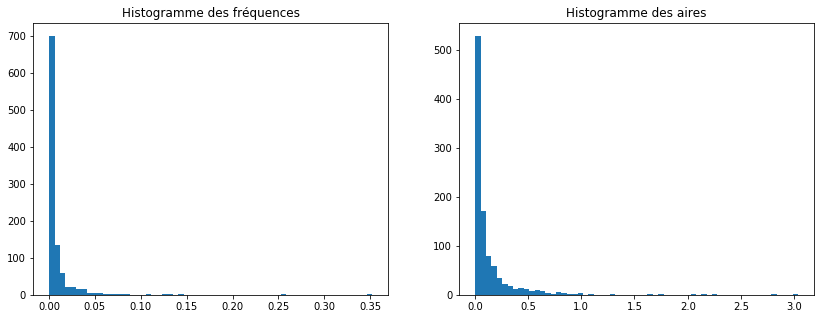

In [122]:
display_distributions(list(set(sampled_patterns_freq['chess'])), 'chess')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'chess' par l'algorithme 2

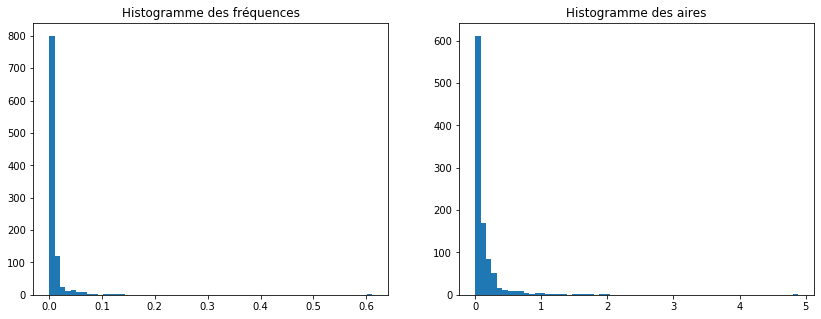

In [95]:
display_distributions(list(set(sampled_patterns_area['chess'])), 'chess')

## Dataset : connect

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'connect' par l'algorithme 1

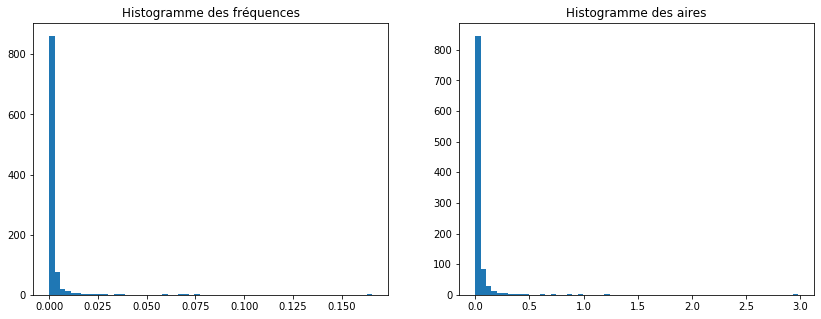

In [96]:
display_distributions(list(set(sampled_patterns_freq['connect'])), 'connect')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'connect' par l'algorithme 2

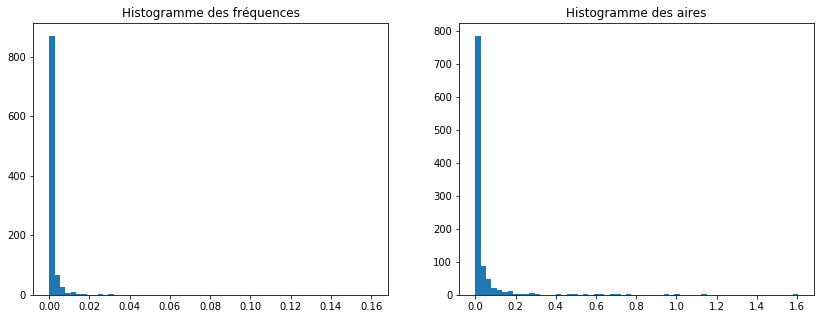

In [97]:
display_distributions(list(set(sampled_patterns_area['connect'])), 'connect')

## Dataset : mushroom

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'mushroom' par l'algorithme 1

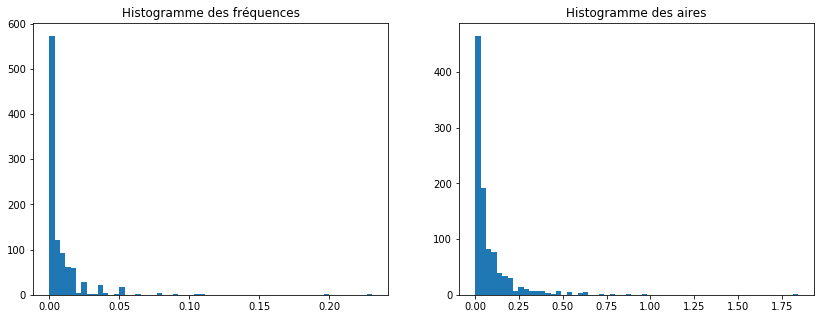

In [98]:
display_distributions(list(set(sampled_patterns_freq['mushroom'])), 'mushroom')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'mushroom' par l'algorithme 2

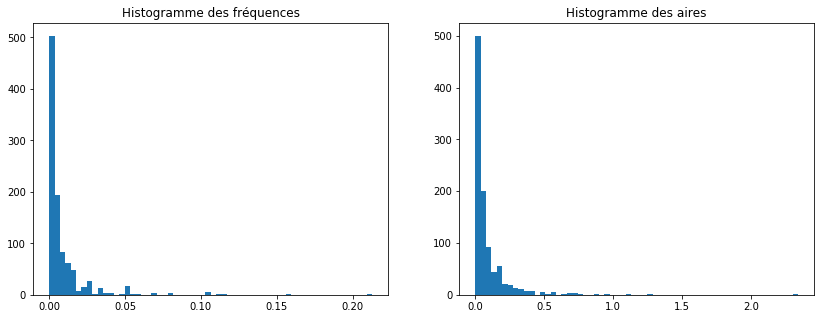

In [99]:
display_distributions(list(set(sampled_patterns_area['mushroom'])), 'mushroom')

## Dataset : pumsb

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb' par l'algorithme 1

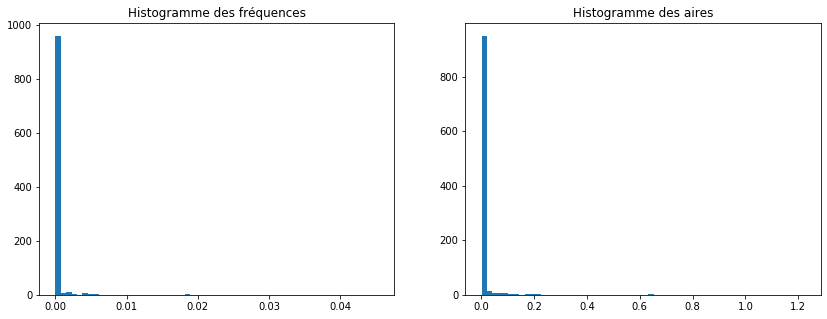

In [100]:
display_distributions(list(set(sampled_patterns_freq['pumsb'])), 'pumsb')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb' par l'algorithme 2

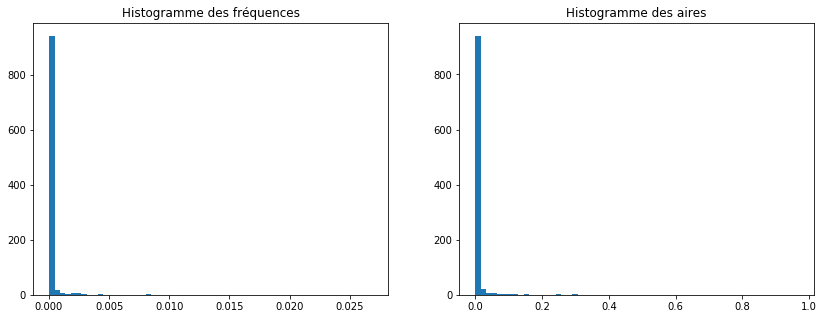

In [101]:
display_distributions(list(set(sampled_patterns_area['pumsb'])), 'pumsb')

## Dataset : pumsb_star

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb_star' par l'algorithme 1

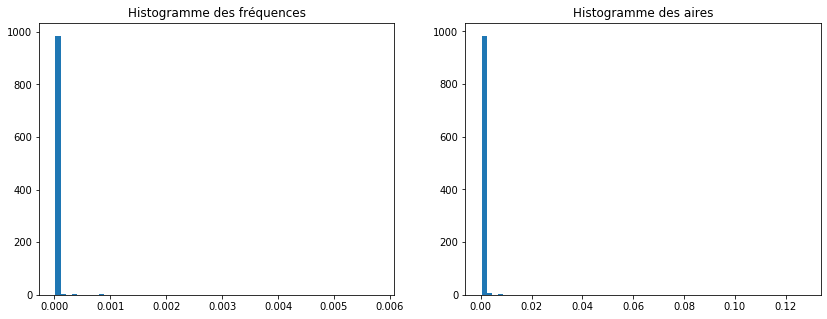

In [102]:
display_distributions(list(set(sampled_patterns_freq['pumsb_star'])), 'pumsb_star')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb_star' par l'algorithme 2

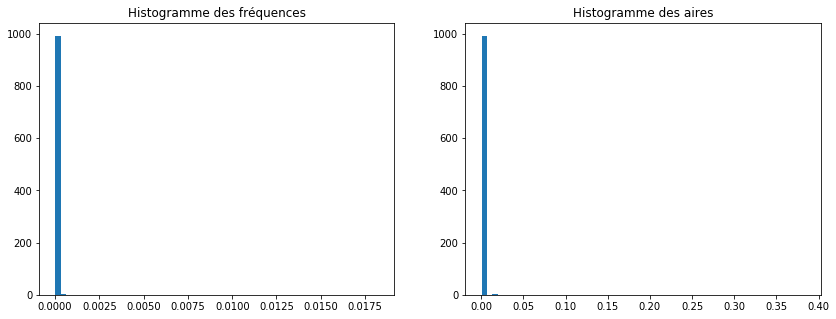

In [103]:
display_distributions(list(set(sampled_patterns_area['pumsb_star'])), 'pumsb_star')

## 6.

#### Mise en place de l'expérience permettant d'évaluer la diversité de k tirages

Pour évaluer la diversité des patterns extraits par nos algorithmes nous avons trouvé le 'Jaccard similarity coefficient', celui-ci permet de jauger la similiarité et la diversité entre deux sets.

Nous allons donc calculer le coefficient de similarité entre un tirage et le suivant afin de vérifier qu'ils ne soient pas trop similaires.

L'index de Jaccard se calcule simplement de cette manière : |intersection| / |union|.
Nous avons donc implémenter une fonction qui applique cette formule entre 2 patterns, nous l'appellons entre tous les patterns extraits et renvoyons la moyenne de tous les indices ainsi récoltés.

Plus la valeur obtenue est basse et moins les patterns extraits sont similaires.
Nous obtenons des valeurs entre .1 et .2 pour tous les datasets, ce qui tend à montrer que les algorithmes permettent d'extraire des patterns fréquents avec une bonne diversité, grantissant ainsi l'intérêt des patterns extraits.

In [190]:
def jaccard_index(p_1, p_2):
    intersection = len(p_1.intersection(p_2))
    union = len(p_1) + len(p_2) - intersection
    return 1. if union == 0 else intersection / union

def avg_jaccard_index(patterns):
    j_index = .0
    nb = .0
    for i in range(len(patterns) - 1):
        for j in range(i + 1, len(patterns)):
            j_index += jaccard_index(set(patterns[i]), set(patterns[j]))
            nb += 1.
    return j_index / nb

In [193]:
print('Moyenne des indices de Jaccard, dataset chess : ' + str(avg_jaccard_index(sampled_patterns_freq['chess'])))
print('Moyenne des indices de Jaccard, dataset connect : ' + str(avg_jaccard_index(sampled_patterns_freq['connect'])))
print('Moyenne des indices de Jaccard, dataset mushroom : ' + str(avg_jaccard_index(sampled_patterns_freq['mushroom'])))
print('Moyenne des indices de Jaccard, dataset pumsb : ' + str(avg_jaccard_index(sampled_patterns_freq['pumsb'])))
print('Moyenne des indices de Jaccard, dataset pumsb_star : ' + str(avg_jaccard_index(sampled_patterns_freq['pumsb_star'])))

Moyenne des indices de Jaccard, dataset chess : 0.22533046757324557
Moyenne des indices de Jaccard, dataset connect : 0.22667274230633674
Moyenne des indices de Jaccard, dataset mushroom : 0.13941463281926428
Moyenne des indices de Jaccard, dataset pumsb : 0.16456875298411594
Moyenne des indices de Jaccard, dataset pumsb_star : 0.11359721786740264


## 7.

#### Mise en place de l'expérience permettant de mettre en évidence que la probabilité d'un motif d'être tiré est proportionnelle à sa mesure

On peut mettre en évidence assez facilement la correlation entre la mesure de l'aire et la fréquence d'apparition des motifs au sein du dataset : il suffit d'afficher un nuage de points entre l'aire des patterns et leur fréquence réelle.

Plus le nuage de point se rapproche d'une fonction linéaire croissante, plus la correlation entre les deux est forte.
Cela prouve que plus l'aire d'un motif est élevé, plus celui-ci a de chances d'être tiré.

In [213]:
def display_area_freq_correlation(dataset_name):
    p_df1 = {}
    for pattern in sampled_patterns_freq[dataset_name]:
        if pattern not in p_df1:
            p_df1[pattern] = 1
        else:
            p_df1[pattern] += 1
    p_df2 = {}
    for pattern in sampled_patterns_area[dataset_name]:
        if pattern not in p_df2:
            p_df2[pattern] = 1
        else:
            p_df2[pattern] += 1

    p_f1 = patterns_freq(sampled_patterns_freq[dataset_name], datasets[dataset_name])
    p_a1 = patterns_area(p_f1)
    p_f2 = patterns_freq(sampled_patterns_area[dataset_name], datasets[dataset_name])
    p_a2 = patterns_area(p_f2)

    f1 = []
    a1 = []
    for i in p_df1.items():
        f1.append(p_f1[i[0]])
        a1.append(p_a1[i[0]])
    f2 = []
    a2 = []
    for i in p_df2.items():
        f2.append(p_f2[i[0]])
        a2.append(p_a2[i[0]])

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
    ax1.scatter(a1, f1)
    ax1.set_title('Correlation aire, fréquence réel, extraction de l\'algo 1')
    ax2.scatter(a2, f2)
    ax2.set_title('Correlation aire, fréquence réel, extraction de l\'algo 2')

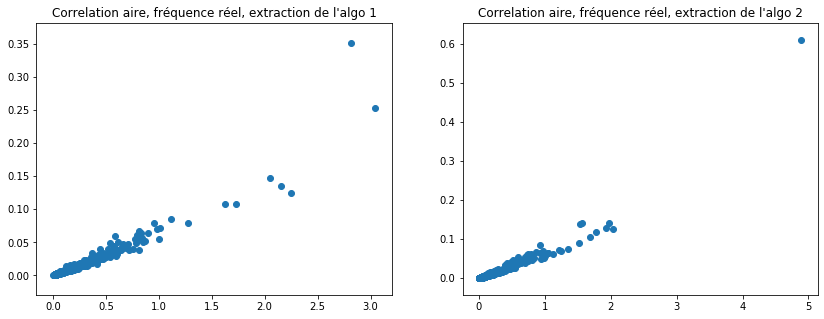

In [214]:
display_area_freq_correlation('chess')

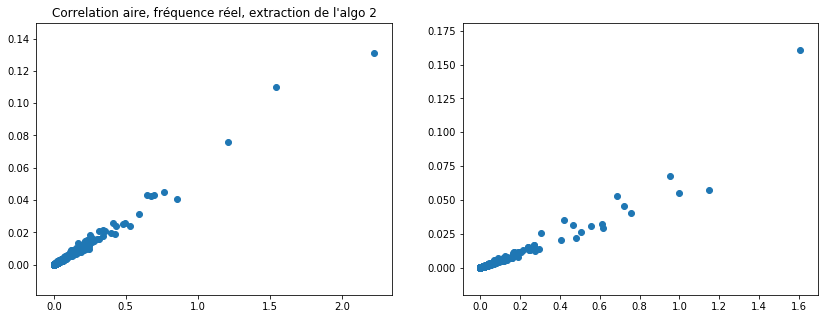

In [201]:
display_area_freq_correlation('connect')

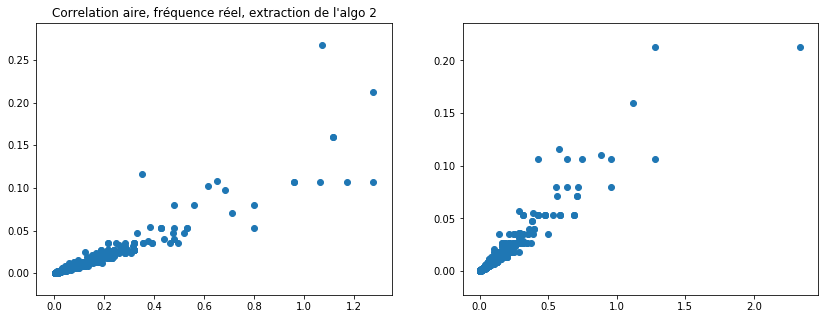

In [202]:
display_area_freq_correlation('mushroom')

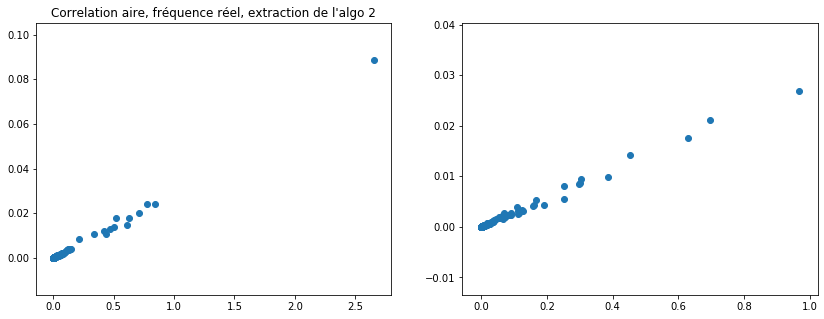

In [203]:
display_area_freq_correlation('pumsb')

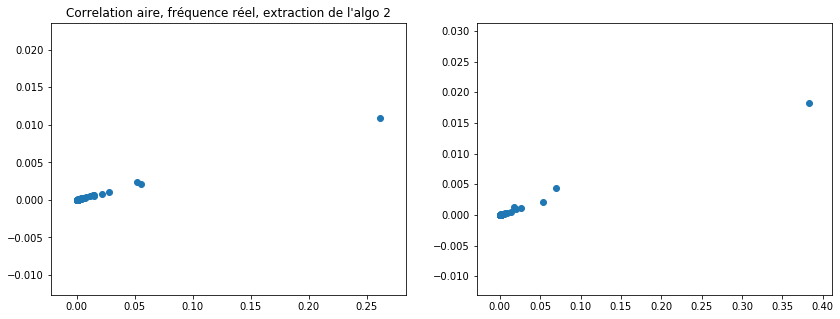

In [204]:
display_area_freq_correlation('pumsb_star')

Pour mettre en évidence la correlation entre la fréquence de tirage et la fréquence réelle au sein du dataset nous pouvons utiliser le même principe mais il faudra pour cela faire beaucoup plus de réalisations.

En effet, pour des datasets importants tels que ceux proposés pour ce TP la fréquence de tirage d'un motif pour un total de 1000 réalisations est généralement toujours de 1. On ne peut donc pas obtenir de correlation intéressante à ce niveau.

Pour vérifier qu'il y a bien une correlation entre les deux nous avons généré un dataset nommé 'small', qui comporte peu de données et nous avons affiché le nuage de point correpondant ci-dessous.
Celui-ci est composé de peu de points mais est tout de même proche d'une fonction linéaire croissante.

Text(0.5, 1.0, "Correlation fréquence de tirage, fréquence réel, extraction de l'algo 1")

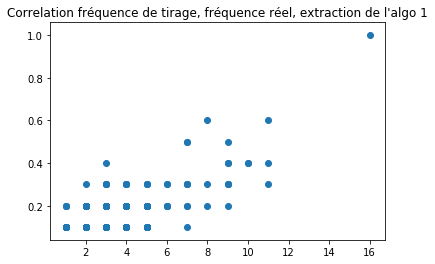

In [219]:
p_df = {}
for pattern in sampled_patterns_freq['small']:
    if pattern not in p_df:
        p_df[pattern] = 1
    else:
        p_df[pattern] += 1

p_f = patterns_freq(sampled_patterns_freq['small'], datasets['small'])

f = []
df = []
for i in p_df.items():
    f.append(p_f[i[0]])
    df.append(i[1])

plt.scatter(df, f)
plt.title('Correlation fréquence de tirage, fréquence réel, extraction de l\'algo 1')

## 8.

#### Résolution du problème avec 'kosarak'

Pour mettre en évidence le problème on peut afficher la taille moyenne des patterns extraits par les deux algorithmes et la taille moyenne des patterns du dataset de base.

In [ ]:
sampled_patterns_freq['kosarak'] = freq_sampling_k(datasets['kosarak'], 1000)
sampled_patterns_area['kosarak'] = area_sampling_k(datasets['kosarak'], 1000)

In [259]:
#Calculate average length of samples from algo 1
print('Taille moyenne des patterns extrais avec l\'algo 1 : ' + str(sum(len(p) for p in sampled_patterns_freq['kosarak']) / len(sampled_patterns_freq['kosarak'])))

#Calculate average length of samples from algo 2
print('Taille moyenne des patterns extrais avec l\'algo 2 : ' + str(sum(len(p) for p in sampled_patterns_area['kosarak']) / len(sampled_patterns_area['kosarak'])))

#Calculate average length of patterns from dataset
print('Taille moyenne des patterns au sein du dataset : ' + str(sum(len(p) for p in datasets['kosarak']) / len(datasets['kosarak'])))

Taille moyenne des patterns extrais avec l'algo 1 : 27.035
Taille moyenne des patterns extrais avec l'algo 2 : 36.725
Taille moyenne des patterns au sein du dataset : 8.099998787881237


En affichant ces résultats on s'apperçoit que les patterns sont tous extraits de la transaction qui est beaucoup plus grande que les autres.
Pour remédier à cela on peut supprimer les transactions trop grandes en calculant l'écart-type et supprimant toutes les transaction de taille supérieures à moyenne + 2 * écart-type.

On obtient ainsi des patterns extraits de taille moyenne 27 pour l'algorithme 1 et 37 pour l'algorithme 2.
Cela rend les patterns extraits exploitables.

In [265]:
#cut off
kosarak_cut_off = datasets['kosarak'].copy()
lengthes = [len(p) for p in kosarak_cut_off]
avg = sum(len(p) for p in kosarak_cut_off) / len(kosarak_cut_off)
std = np.std(lengthes)

for i in range(len(kosarak_cut_off) - 1, 0 - 1, -1):
    if len(kosarak_cut_off[i]) >= avg + (2 * std):
        kosarak_cut_off.pop(i)

In [254]:
sum(len(p) for p in kosarak_cut_off) / len(kosarak_cut_off)

5.734347961496655

In [266]:
sampled_patterns_freq['kosarak'] = freq_sampling_k(kosarak_cut_off, 1000)
print('Taille moyenne des patterns extrais avec l\'algo 1 : ' + str(sum(len(p) for p in sampled_patterns_freq['kosarak']) / len(sampled_patterns_freq['kosarak'])))

Taille moyenne des patterns extrais avec l'algo 1 : 26.989


In [258]:
sampled_patterns_area['kosarak'] = area_sampling_k(kosarak_cut_off, 1000)
print('Taille moyenne des patterns extrais avec l\'algo 2 : ' + str(sum(len(p) for p in sampled_patterns_area['kosarak']) / len(sampled_patterns_area['kosarak'])))

Taille moyenne des patterns extrais avec l'algo 2 : 36.725


## 9.

#### Implémentation de l'algorithme 3

### Hors TP

Nous avions implémenté l'algorithme a-priori dans l'objectif de faire une comparaison avec une méthode complète pour la question 7.
Il serait cependant beaucoup trop long d'exécuter cet algorithme avec l'un des datasets de ce TP, nous l'avons donc testé pour notre dataset 'small'.

In [14]:
def a_priori(dataset, minsup):
    flattened_dataset = [i for sublist in dataset for i in sublist]
    c = [[[i] for i in sorted(list(set(flattened_dataset)))]]
    f = []
    i = 0
    over = False
    while not over:
        f.append(evaluate(c[i], dataset, minsup))
        ci = gen_candidates(f[i])
        if len(ci) == 0:
            over = True
        else:
            c.append(ci)
            i += 1
    return (c, f)

def evaluate(ci, dataset, minsup):
    fi = []
    for candidate in ci:
        count = 0
        for line in dataset:
            in_line = True
            for attr in candidate:
                if attr not in line:
                    in_line = False
                    break
            count += in_line
        if count >= minsup:
            fi.append(candidate)
    return fi

def gen_candidates(fi):
    ci = []
    if len(fi) > 1:
        for i in range(len(fi) - 1):
            for j in range(i + 1, len(fi)):
                if len(fi[i]) == 1:
                    ci.append([fi[i][0], fi[j][0]])
                else:
                    if fi[i][1:] == fi[j][:-1]:
                        cii = [fi[i][0]]
                        cii.extend(fi[j])
                        ci.append(cii)
    return ci

In [260]:
c, f = a_priori(datasets['small'], 3)

In [261]:
for cand in c:
    print(cand)

[[1], [2], [3], [4], [5], [6], [7], [9], [10], [16], [24], [65], [66], [78], [120]]
[[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 16], [1, 65], [2, 3], [2, 4], [2, 5], [2, 6], [2, 16], [2, 65], [3, 4], [3, 5], [3, 6], [3, 16], [3, 65], [4, 5], [4, 6], [4, 16], [4, 65], [5, 6], [5, 16], [5, 65], [6, 16], [6, 65], [16, 65]]
[[1, 3, 4], [1, 3, 5], [1, 3, 6], [1, 3, 16], [1, 3, 65], [1, 4, 5], [1, 4, 6], [1, 4, 16], [1, 16, 65], [3, 4, 5], [3, 4, 6], [3, 4, 16], [3, 5, 6], [3, 16, 65], [4, 5, 6], [4, 16, 65]]
[[1, 3, 4, 5], [1, 3, 4, 6], [1, 3, 16, 65], [3, 4, 5, 6]]


In [262]:
for pattern in f:
    print(pattern)

[[1], [2], [3], [4], [5], [6], [16], [65]]
[[1, 3], [1, 4], [1, 16], [1, 65], [3, 4], [3, 5], [3, 6], [3, 16], [3, 65], [4, 5], [4, 6], [4, 16], [5, 6], [16, 65]]
[[1, 3, 4], [1, 3, 16], [1, 3, 65], [1, 16, 65], [3, 4, 5], [3, 4, 6], [3, 5, 6], [3, 16, 65], [4, 5, 6]]
[[1, 3, 16, 65], [3, 4, 5, 6]]
